In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

import numpy as np
import pandas as pd

In [2]:
from osu_util import read_osu_log, read_osu_log_multi, plot_osu

In [3]:
ls osu_log/pt2pt/

run1/  run10/ run2/  run3/  run4/  run5/  run6/  run7/  run8/  run9/


In [4]:
ls osu_log/pt2pt/run1

intelmpi-efa/ intelmpi-tcp/ mpich3/       openmpi3/     openmpi4/


In [5]:
ls osu_log/pt2pt/run1/intelmpi-efa/

bibw.log     bw.log       latency.log


In [6]:
def read_osu_all_runs(suffix, prefix='./osu_log/pt2pt/', runs=10):
    file_list = [
        prefix + 'run{}'.format(i) + suffix for i in range(1, 11)
    ]
    df = read_osu_log_multi(file_list, skiprows=2)
    return df

def stats(df):
    # similar to df.T.describe().T
    return df.apply(['mean', 'std', 'median', 'min', 'max'], axis=1)

# Latency

In [7]:
lat_impi_efa = read_osu_all_runs('/intelmpi-efa/latency.log')
stats(lat_impi_efa)

,mean,std,median,min,max
0,16.149,0.017920,16.145,16.13,16.19
1,16.710,0.497214,17.080,16.12,17.12
2,16.114,0.011738,16.115,16.10,16.13
4,16.106,0.016465,16.105,16.08,16.14
8,16.108,0.016193,16.105,16.09,16.14
16,16.174,0.018379,16.170,16.15,16.21
32,16.167,0.013375,16.170,16.15,16.18
64,16.202,0.064083,16.185,16.14,16.37
128,16.195,0.025927,16.190,16.16,16.24
256,16.292,0.025734,16.295,16.26,16.33


In [8]:
lat_impi_tcp = read_osu_all_runs('/intelmpi-tcp/latency.log')
stats(lat_impi_tcp)

,mean,std,median,min,max
0,34.953,2.891785,34.730,30.55,39.67
1,34.863,2.898199,34.645,30.43,39.62
2,34.894,2.927825,34.715,30.41,39.69
4,34.799,2.780298,34.625,30.51,39.06
8,34.830,2.899249,34.590,30.42,39.60
16,34.875,2.853058,34.690,30.51,39.49
32,35.991,3.032163,35.790,31.52,40.70
64,35.896,3.054571,35.630,31.41,40.67
128,35.934,2.974279,35.790,31.47,40.19
256,37.662,3.519570,37.865,33.13,43.21


In [9]:
lat_ompi3 = read_osu_all_runs('/openmpi3/latency.log')
lat_ompi4 = read_osu_all_runs('/openmpi4/latency.log')
lat_mpich = read_osu_all_runs('/mpich3/latency.log')

In [10]:
lat_list = [lat_impi_efa, lat_impi_tcp, lat_ompi3, lat_ompi4, lat_mpich]
mpi_cases = ['IntelMPI-EFA', 'IntelMPI-TCP', 'OpenMPI 3', 'OpenMPI 4', 'MPICH']

lat_mean_all = pd.concat([df.mean(axis=1) for df in lat_list], keys=mpi_cases, axis=1)
lat_std_all = pd.concat([df.std(axis=1) for df in lat_list], keys=mpi_cases, axis=1)
lat_std_all

,IntelMPI-EFA,IntelMPI-TCP,OpenMPI 3,OpenMPI 4,MPICH
size,,,,,
0,0.017920,2.891785,2.184177,2.328753,2.744171
1,0.497214,2.898199,2.213384,2.363153,2.693202
2,0.011738,2.927825,2.199289,2.330744,2.768894
4,0.016465,2.780298,2.200809,2.342364,4.338583
8,0.016193,2.899249,2.199799,2.330741,2.815626
16,0.018379,2.853058,2.182483,2.349137,2.809976
32,0.013375,3.032163,2.177222,2.340566,2.858869
64,0.064083,3.054571,2.288876,2.373913,2.933370
128,0.025927,2.974279,2.325209,2.374111,2.867740


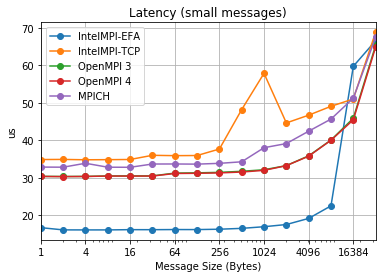

In [11]:
plot_osu(lat_mean_all[1:17], x_freq=2)
plt.title('Latency (small messages)')
plt.ylabel('us');

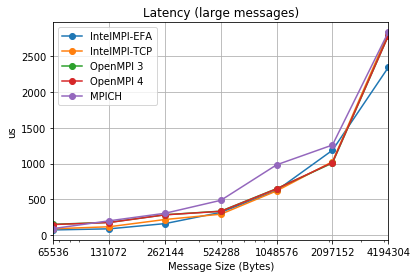

In [12]:
plot_osu(lat_mean_all[17:], x_freq=1)
plt.title('Latency (large messages)')
plt.ylabel('us');

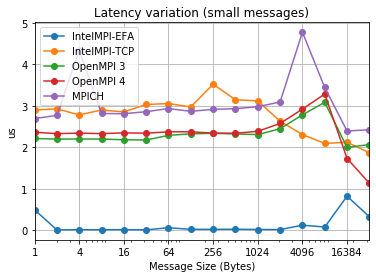

In [13]:
plot_osu(lat_std_all[1:17], x_freq=2)
plt.title('Latency variation (small messages)')
plt.ylabel('us');

# Bandwidth

In [14]:
bw_impi_efa = read_osu_all_runs('/intelmpi-efa/bw.log')
stats(bw_impi_efa)

,mean,std,median,min,max
1,0.460,0.206667,0.610,0.22,0.63
2,1.162,0.254375,1.235,0.44,1.28
4,1.877,0.864948,2.510,0.87,2.59
8,5.089,0.095038,5.105,4.92,5.22
16,10.225,0.152989,10.215,10.00,10.46
32,19.387,4.354740,20.795,7.04,21.30
64,41.538,0.798997,41.480,40.36,42.70
128,77.845,17.550937,83.120,28.03,85.48
256,171.865,3.162728,171.525,167.78,176.70
512,288.661,92.699687,331.865,112.08,338.19


In [15]:
bw_impi_tcp = read_osu_all_runs('/intelmpi-tcp/bw.log')
stats(bw_impi_tcp)

,mean,std,median,min,max
1,0.195,0.007071,0.200,0.18,0.20
2,0.395,0.011785,0.400,0.38,0.41
4,0.790,0.021602,0.795,0.76,0.82
8,1.579,0.047481,1.595,1.51,1.63
16,3.150,0.094045,3.175,3.00,3.26
32,6.253,0.187560,6.270,5.94,6.51
64,12.489,0.371407,12.510,11.87,13.02
128,24.871,0.700007,25.015,23.88,25.69
256,29.924,2.933277,28.555,27.49,35.73
512,58.729,5.720384,56.255,53.45,70.51


In [16]:
bw_ompi3 = read_osu_all_runs('/openmpi3/bw.log')
bw_ompi4 = read_osu_all_runs('/openmpi4/bw.log')
bw_mpich = read_osu_all_runs('/mpich3/bw.log')

In [17]:
bw_list = [bw_impi_efa, bw_impi_tcp, bw_ompi3, bw_ompi4, bw_mpich]
mpi_cases = ['IntelMPI-EFA', 'IntelMPI-TCP', 'OpenMPI 3', 'OpenMPI 4', 'MPICH']

bw_mean_all = pd.concat([df.mean(axis=1) for df in bw_list], keys=mpi_cases, axis=1)
bw_std_all = pd.concat([df.std(axis=1) for df in bw_list], keys=mpi_cases, axis=1)
bw_std_all

,IntelMPI-EFA,IntelMPI-TCP,OpenMPI 3,OpenMPI 4,MPICH
size,,,,,
1,0.206667,0.007071,0.022136,0.023944,0.024129
2,0.254375,0.011785,0.039944,0.035214,0.065498
4,0.864948,0.021602,0.076041,0.075100,0.101784
8,0.095038,0.047481,0.163466,0.128513,0.205426
16,0.152989,0.094045,0.220394,0.268775,0.395677
32,4.354740,0.187560,0.498399,0.596382,0.931391
64,0.798997,0.371407,1.433758,1.593983,2.245589
128,17.550937,0.700007,4.800563,4.390515,3.796595
256,3.162728,2.933277,7.063620,5.734884,4.462528


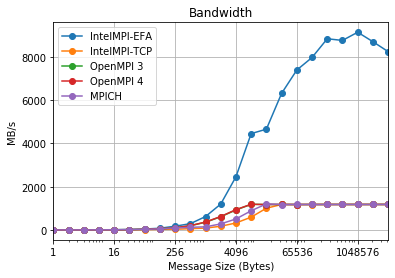

In [18]:
plot_osu(bw_mean_all)
plt.title('Bandwidth')
plt.ylabel('MB/s');

# Bi-directional bandwidth

In [19]:
bibw_impi_efa = read_osu_all_runs('/intelmpi-efa/bibw.log')
bibw_impi_tcp = read_osu_all_runs('/intelmpi-tcp/bibw.log')
bibw_ompi3 = read_osu_all_runs('/openmpi3/bibw.log')
bibw_ompi4 = read_osu_all_runs('/openmpi4/bibw.log')
bibw_mpich = read_osu_all_runs('/mpich3/bibw.log')

In [20]:
bibw_list = [bibw_impi_efa, bibw_impi_tcp, bibw_ompi3, bibw_ompi4, bibw_mpich]
mpi_cases = ['IntelMPI-EFA', 'IntelMPI-TCP', 'OpenMPI 3', 'OpenMPI 4', 'MPICH']

bibw_mean_all = pd.concat([df.mean(axis=1) for df in bibw_list], keys=mpi_cases, axis=1)
bibw_std_all = pd.concat([df.std(axis=1) for df in bibw_list], keys=mpi_cases, axis=1)
bibw_mean_all

,IntelMPI-EFA,IntelMPI-TCP,OpenMPI 3,OpenMPI 4,MPICH
size,,,,,
1,0.474,0.247,0.826,0.796,0.873
2,2.249,0.510,1.681,1.643,1.781
4,4.588,1.021,3.379,3.313,3.558
8,9.161,2.026,6.723,6.626,7.148
16,18.581,4.039,13.466,13.260,14.162
32,37.466,8.046,26.851,26.425,27.254
64,75.023,15.851,53.283,52.254,52.625
128,150.873,31.222,103.458,101.210,86.243
256,305.996,27.116,200.305,196.371,148.509


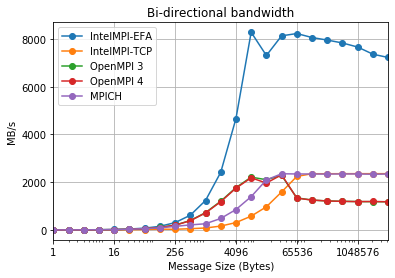

In [21]:
plot_osu(bibw_mean_all)
plt.title('Bi-directional bandwidth')
plt.ylabel('MB/s');